# Multiple Linear Regression

#### Problem Statement:

BoomBikes, a US bike-sharing provider, has experienced significant revenue declines due to the ongoing COVID-19 pandemic. The company is struggling to survive in the current market conditions. To prepare for the post-quarantine period and to better meet the anticipated demand for shared bikes, BoomBikes aims to understand the factors influencing bike demand. By doing so, they hope to outperform competitors and achieve substantial profits.

***Objective:***

The company seeks to identify the key variables that significantly impact the demand for shared bikes and understand how well these variables explain the variation in bike demand.

***Goal:***
The ultimate goal is to develop a predictive model that highlights these significant variables. The insights gained from this model will help the management formulate effective business strategies to align with customer demand and enhance service delivery.

### Step1: Importing Libraries

In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

### Step2: Reading Dataset and Understanding Data

In [2]:
#Read the csv file using pandas
bikeSharing_df = pd.read_csv(r'/Users/pallavidasgupta/Documents/Course Material/Upgrad_2024/Bike sharing/day.csv')

In [3]:
#Inspect first few rows
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check the shape
bikeSharing_df.shape

(730, 16)

In [5]:
#check dataframe for null and datatype 
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#check the details of numerical data
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#check the columns of data
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#check the size of data
bikeSharing_df.size

11680

In [9]:
#check the datatypes of data
bikeSharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
#check the axes of data
bikeSharing_df.axes


[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [11]:
#check the dimensions of data
bikeSharing_df.ndim

2

#### There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.

### Step3: Cleaning Data

#### 3.1 Drop columns that are not useful for analysis

In [12]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [13]:
#Inspect once
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [14]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`, which leads to data leakage.

In [15]:
#Inspect data frame after dropping
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [16]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [17]:
bikeSharing_df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [18]:
bikeSharing_df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [19]:
bikeSharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


- we see, features like `season, mnth, weekday and  weathersit` are integers, however they should be non-numerical categories.

#### 3.2 Handle Outliers

In [20]:
### Handle Outliers
bikeSharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [21]:
#Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

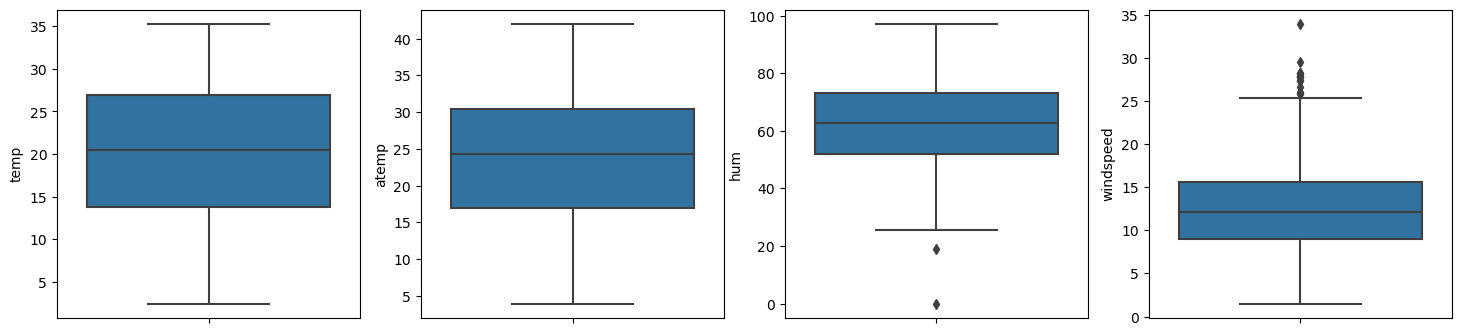

In [22]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

#### From the above plots, we see there are no outliers.

### 4. EDA

#### 4.1 Convert season and  weathersit to categorical types

In [23]:
bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


#### 4.2 Draw pair Plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

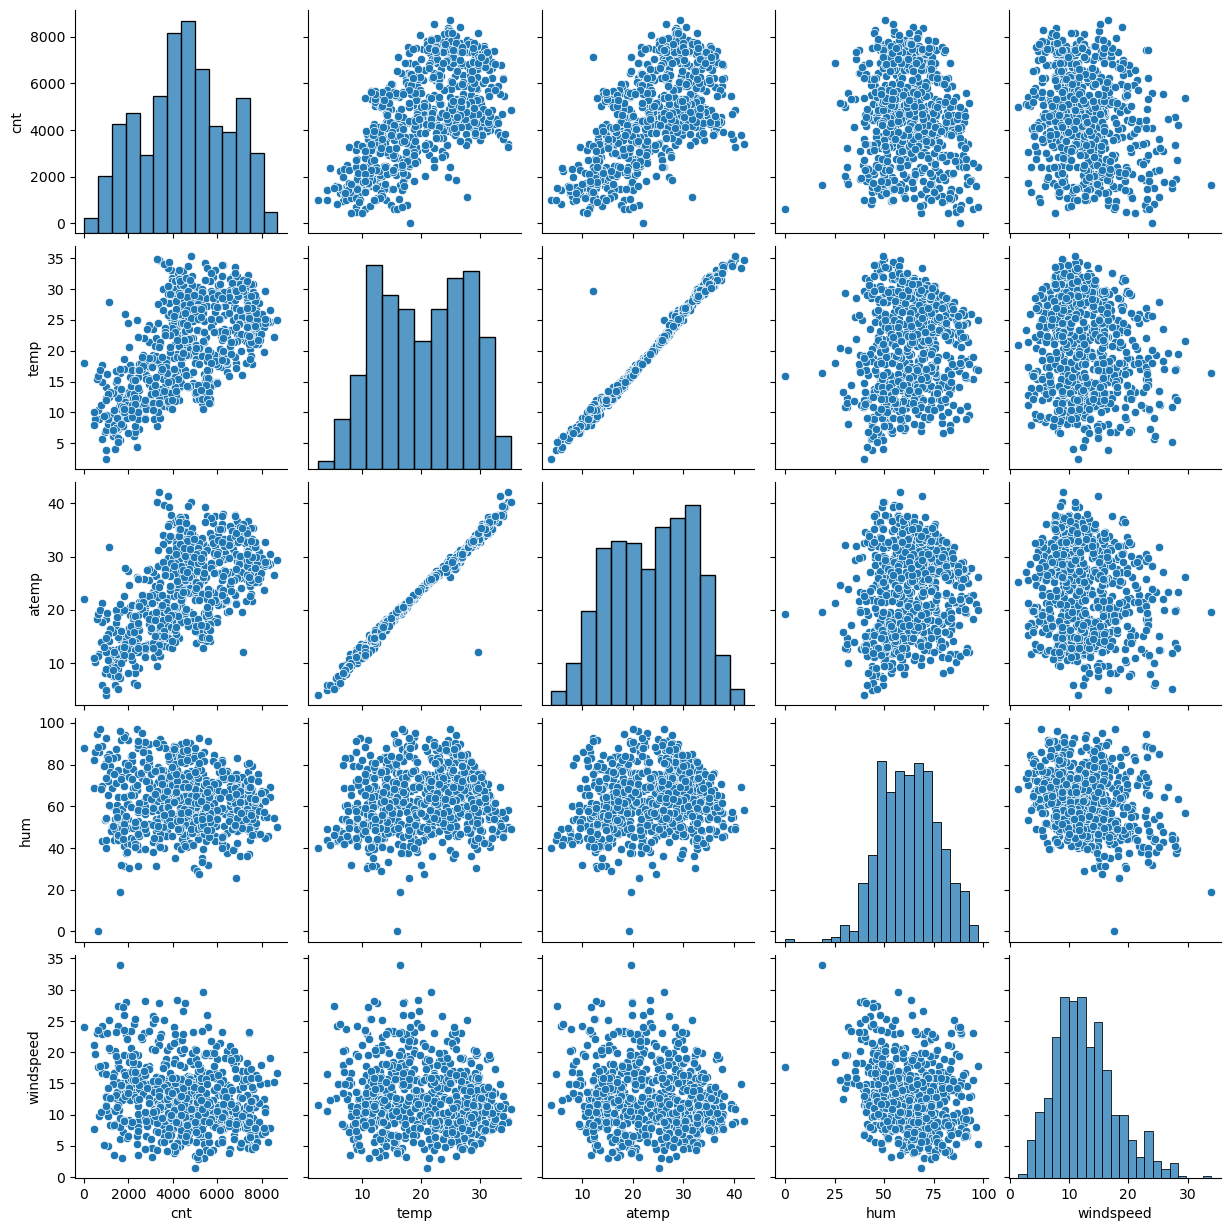

In [24]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### _`Inference`_: 
- variables temp and atemp have highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
#### Referring the correlation map, output variable has a linear relationship with variables like temp, atemp. 

#### 4.3 Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 2000x1500 with 0 Axes>

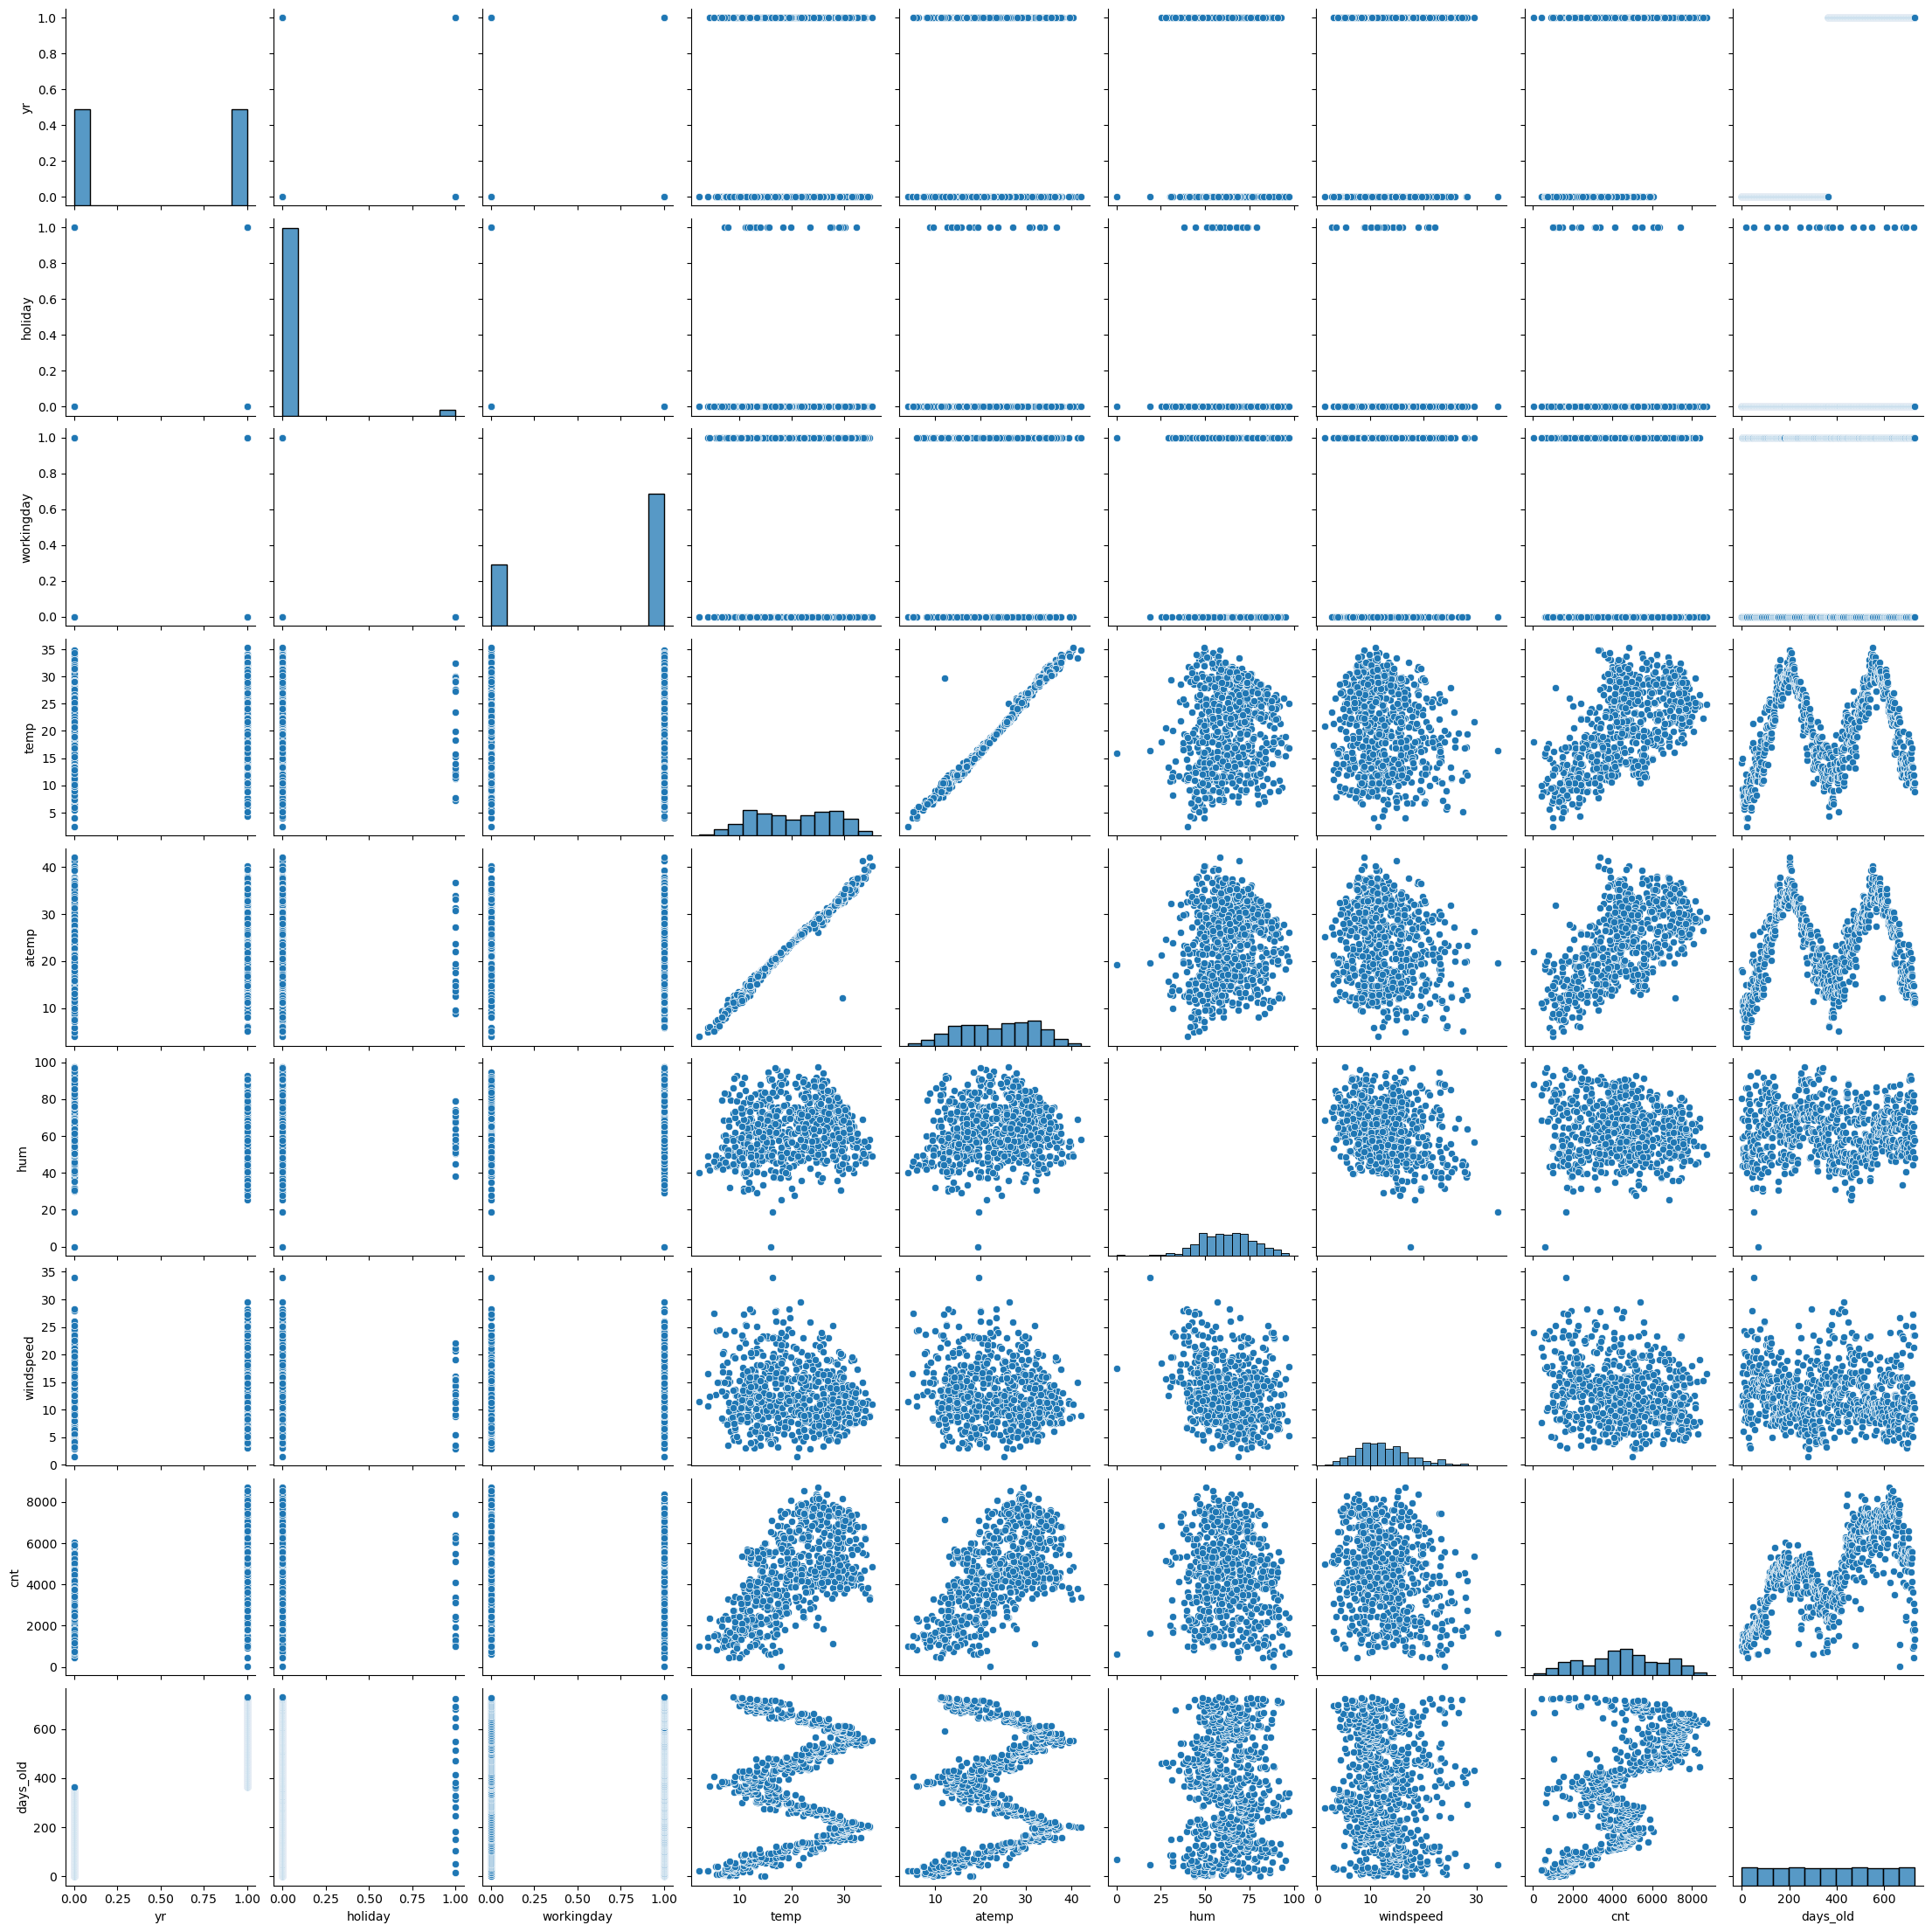

In [25]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharing_df)
plt.show()

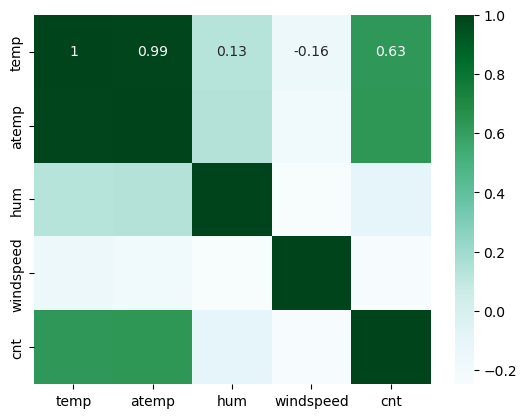

In [26]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Variables, temp and atemp have a correlation more than .99 (highly correlated) and atemp is derived from temp, atemp field shall be dropped from the dataset

#### 4.4 Analysing Categorical Variabels with target variables 

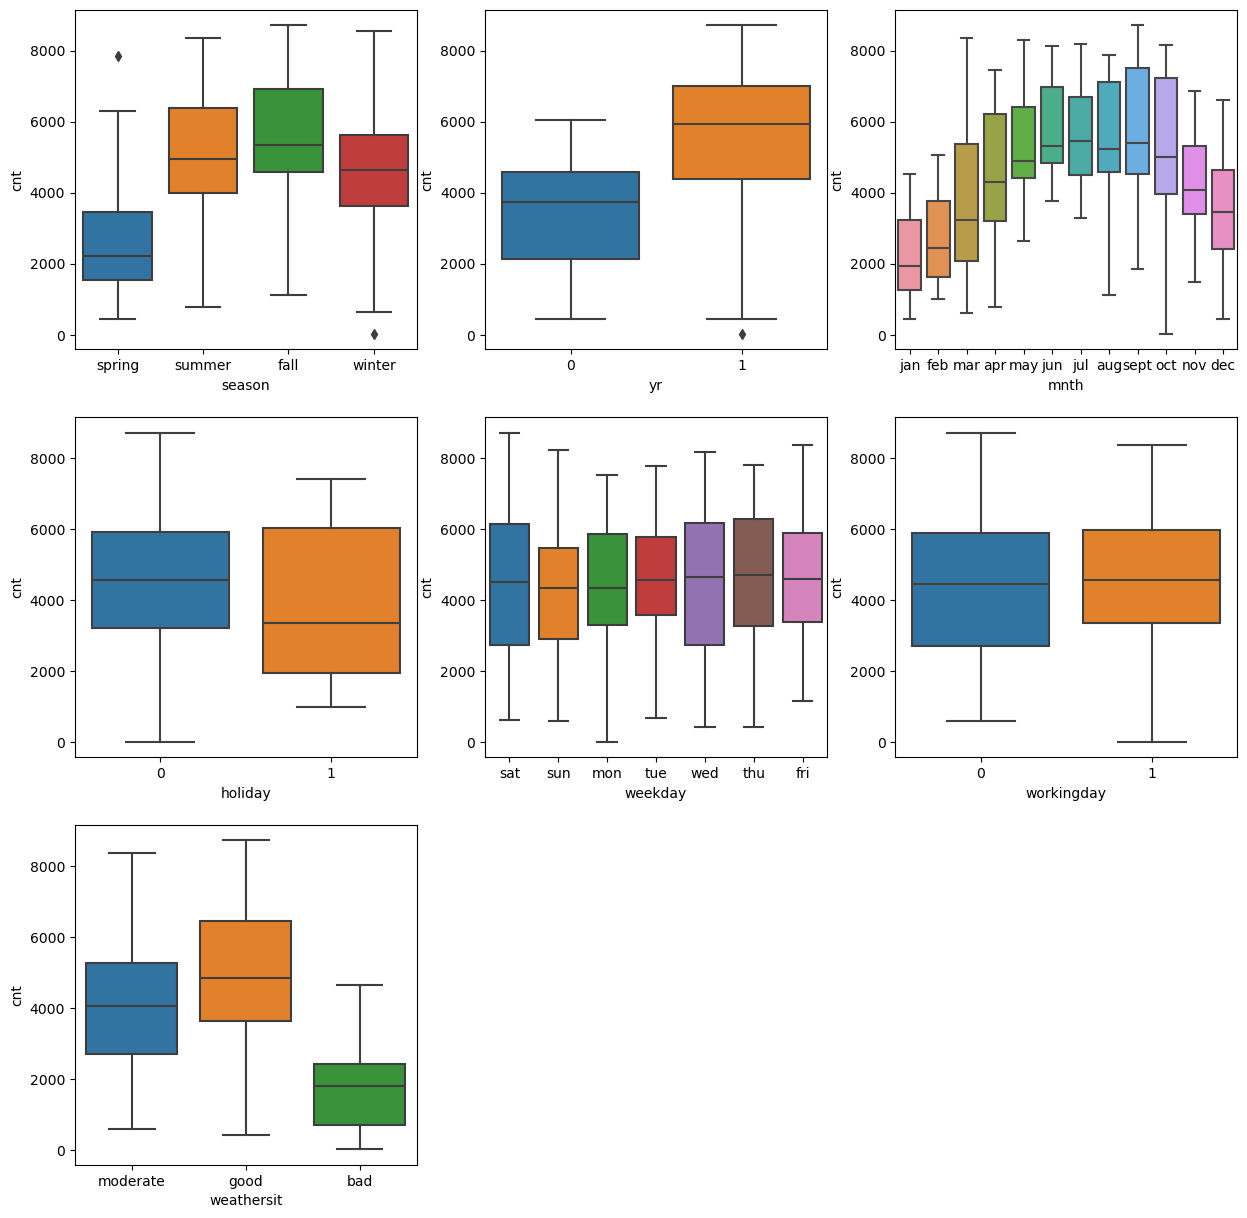

In [27]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()

#### _`Inference`_:
    Following are the insights:

    1. Season: 'fall' has highest demand for rental bikes
    2. YoY demand has grown
    3.Demand is continuously growing each month until June, with the highest demand observed in September. After September, demand decreases.
    4. Demand decreases on holidays.
    5. Weekdays do not show a clear pattern in demand.
    6. Clear weather conditions see the highest demand.
    7. Bike sharing peaks in September.

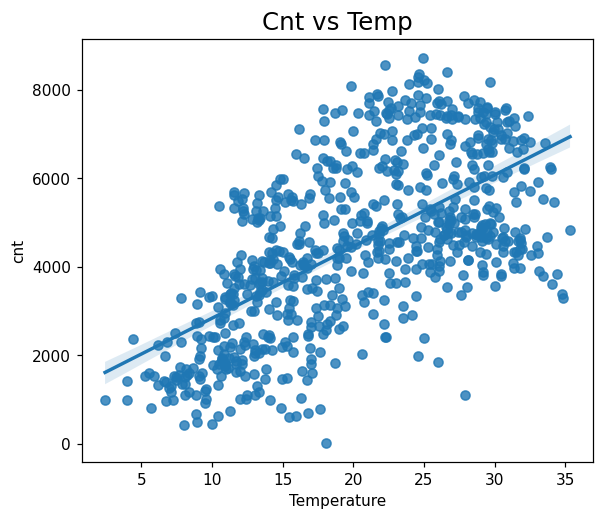

In [28]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### _`Inference`_:
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

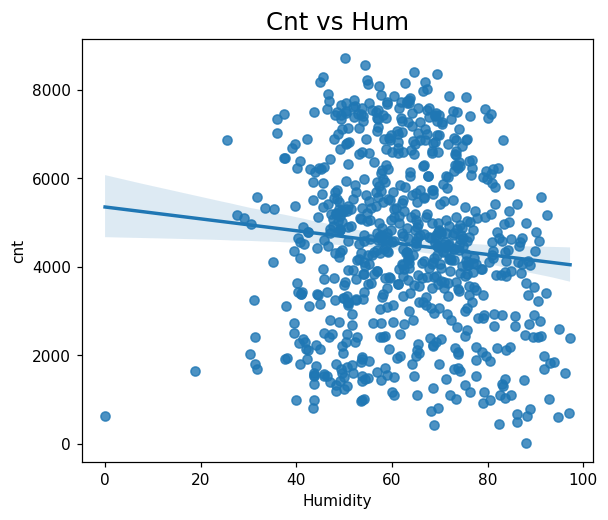

In [29]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### _`Inference`_:
- Humidity values are more scattered.
- cnt decreasing with increase in humidity.

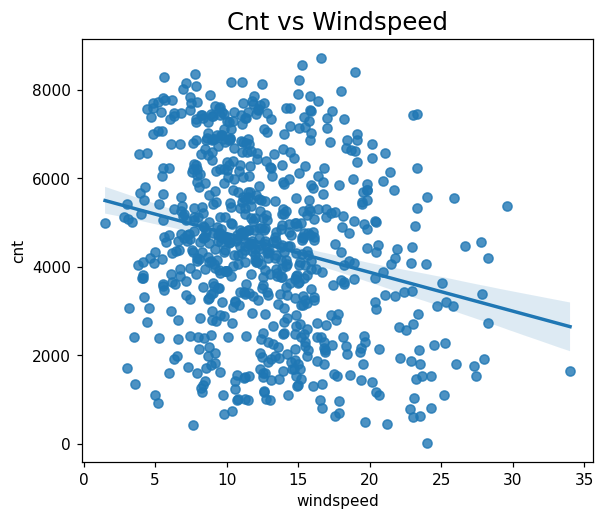

In [30]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()

#### _`Inference`_:
- Windspeed values are more scattered .
- cnt decreasing with increase in windspeed.

In [31]:
bikeSharing_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


In [32]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


### 5. Data Preparation

#### 5.1 Create dummy variables for all categorical variables

In [33]:
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"])

In [34]:
bikeSharing_df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,True,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,True,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,True,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,True,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,True,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,725,True,...,False,False,False,False,True,False,False,False,False,True
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,726,True,...,False,False,False,False,False,False,False,False,False,True
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,727,True,...,False,False,True,False,False,False,False,False,False,True
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,728,True,...,False,False,False,True,False,False,False,False,True,False


- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [35]:
#Print columns after creating dummies
bikeSharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [36]:
# Convert boolean columns to numeric
bool_cols = bikeSharing_df.select_dtypes(include='bool').columns
bikeSharing_df[bool_cols] = bikeSharing_df[bool_cols].astype(int)

In [37]:
# Ensure all columns are numeric
try:
    assert bikeSharing_df.applymap(np.isreal).all().all(), "Non-numeric values found"
except AssertionError as e:
    print(e)
    print(bikeSharing_df.applymap(type).head())

In [38]:
# Check for NaN values
print(bikeSharing_df.isnull().sum())

yr                     0
holiday                0
workingday             0
temp                   0
atemp                  0
hum                    0
windspeed              0
cnt                    0
days_old               0
season_spring          0
season_summer          0
season_winter          0
mnth_aug               0
mnth_dec               0
mnth_feb               0
mnth_jan               0
mnth_jul               0
mnth_jun               0
mnth_mar               0
mnth_may               0
mnth_nov               0
mnth_oct               0
mnth_sept              0
weekday_mon            0
weekday_sat            0
weekday_sun            0
weekday_thu            0
weekday_tue            0
weekday_wed            0
weathersit_bad         0
weathersit_good        0
weathersit_moderate    0
dtype: int64


In [39]:
#Print few rows to inspect
bikeSharing_df.dtypes

yr                       int64
holiday                  int64
workingday               int64
temp                   float64
atemp                  float64
hum                    float64
windspeed              float64
cnt                      int64
days_old                 int64
season_spring            int64
season_summer            int64
season_winter            int64
mnth_aug                 int64
mnth_dec                 int64
mnth_feb                 int64
mnth_jan                 int64
mnth_jul                 int64
mnth_jun                 int64
mnth_mar                 int64
mnth_may                 int64
mnth_nov                 int64
mnth_oct                 int64
mnth_sept                int64
weekday_mon              int64
weekday_sat              int64
weekday_sun              int64
weekday_thu              int64
weekday_tue              int64
weekday_wed              int64
weathersit_bad           int64
weathersit_good          int64
weathersit_moderate      int64
dtype: o

### 6. Model Building

#### 6.1 Feature Scaling continuous variables

Following columns are continous and must be scaled
temp,hum,windspeed

In [40]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [41]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = StandardScaler()

#Fit and transform training set only
bikeSharing_df[num_vars] = scaler.fit_transform(bikeSharing_df[num_vars])

In [42]:
#Inspect stats fro Training set after scaling
bikeSharing_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,730.000000,730.000000,730.000000,7.300000e+02,7.300000e+02,7.300000e+02,7.300000e+02,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,-2.530700e-16,3.893385e-17,-9.246789e-16,7.786770e-17,4508.006849,0.000000,0.246575,...,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.634247,0.336986
std,0.500343,0.167266,0.465405,1.000686e+00,1.000686e+00,1.000686e+00,1.000686e+00,1936.011647,1.000686,0.431313,...,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.481971,0.473004
min,0.000000,0.000000,0.000000,-2.385484e+00,-2.427687e+00,-4.411436e+00,-2.169254e+00,22.000000,-1.729680,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.674665e-01,-8.393912e-01,-7.566278e-01,-7.168275e-01,3169.750000,-0.864840,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,1.953817e-02,7.881218e-02,-9.852162e-03,-1.229315e-01,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,8.746625e-01,8.250069e-01,7.186196e-01,5.511970e-01,5966.000000,0.864840,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,2.000789e+00,2.249122e+00,2.423758e+00,4.089995e+00,8714.000000,1.729680,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,-0.827613,-0.680818,1.252343,-0.387833,985,-1.729680,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,-0.722069,-0.741507,0.480996,0.748899,801,-1.724934,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,-1.635432,-1.750344,-1.338073,0.745931,1349,-1.720189,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,-1.615560,-1.610886,-0.261577,-0.389769,1562,-1.715444,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,-1.468226,-1.505615,-1.340294,-0.046477,1600,-1.710698,1,...,0,0,0,0,0,0,1,0,1,0


#### 6.2 Build a Model using RFE and Automated approach

##### Use RFE to eliminate some columns

In [44]:
assert bikeSharing_df.applymap(np.isreal).all().all(), "Non numeric values found"

In [45]:
bikeSharing_df.shape

(730, 32)

In [46]:
#y to contain only target variable
X = bikeSharing_df.drop(columns = ['cnt'])

#X is all remainign variable also our independent variables
y = bikeSharing_df['cnt']

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
X_train = sm.add_constant(X_train)

In [48]:
X_train_array = X_train.values
y_train_array = y_train.values

In [49]:
model = sm.OLS(y_train_array,X_train_array).fit()

In [50]:
vif_data = pd.DataFrame()

In [51]:
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_array, i) for i in range(X_train_array.shape[1])]

# Show the VIF data and model summary
vif_data, model.summary()

(                Feature         VIF
 0                 const    0.000000
 1                    yr  449.975184
 2               holiday         inf
 3            workingday         inf
 4                  temp  219.907589
 5                 atemp  203.441936
 6                   hum    2.065572
 7             windspeed    1.382708
 8              days_old  611.026405
 9         season_spring   10.955221
 10        season_summer    8.210383
 11        season_winter    8.374999
 12             mnth_aug   19.111955
 13             mnth_dec   60.357483
 14             mnth_feb    9.006247
 15             mnth_jan   15.675281
 16             mnth_jul   15.616651
 17             mnth_jun    6.838728
 18             mnth_mar    3.591118
 19             mnth_may    3.215382
 20             mnth_nov   57.972779
 21             mnth_oct   43.001305
 22            mnth_sept   30.665362
 23          weekday_mon    1.941647
 24          weekday_sat         inf
 25          weekday_sun         inf
 

#### _`Inference`_:


Variance Inflation Factor (VIF)

- The VIF results indicate that several variables have high multicollinearity (VIF > 5), particularly temp, atemp, and some categorical variables. High VIF values suggest that these predictors are highly correlated, which can cause instability in the coefficient estimates of the regression model.

OLS Regression Results

- The OLS regression results provide insights into the significance and impact of various variables on bike demand (cnt).

Significant Variables (p-value < 0.05):

- temp (temperature)
- atemp (feels-like temperature)
- Several months (mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10)
- season_3 (summer) and season_4 (fall)
- workingday_1 (working day)
- weathersit_2 (mist + cloud) and weathersit_3 (light rain, snow, storm)
- yr_1 (year 1)

Multicollinearity Concerns:

- High VIF values for temp and atemp suggest multicollinearity. We should consider removing one of these variables or using techniques like Principal Component Analysis (PCA) to address this issue.

Model Fit:

- The R-squared value of 0.849 indicates that approximately 84.9% of the variance in bike demand is explained by the model, which is a good fit.
- The Adjusted R-squared value of 0.843 accounts for the number of predictors in the model and is also high, suggesting the model's effectiveness.

Next Steps
- Address Multicollinearity:
- Consider removing either temp or atemp to reduce multicollinearity.
- Evaluate VIF again after making adjustments.
- Refit the Model: Refit the regression model after addressing multicollinearity and re-evaluate the significance of the predictors.
- Interpret and Report Results:
- Provide management with insights on significant variables influencing bike demand.
- Highlight the potential impact of temperature, season, weather conditions, and working days on bike-sharing demand.


### Iteration1:

In [52]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [53]:
# Drop the variable with the highest VIF (excluding the intercept)
X_train_1 = X_train.drop(columns=['atemp'])  # Dropping 'atemp'
X_test_1 = X_test.drop(columns=['atemp'])


X_train_array = X_train_1.values

# Build the model
model_1 = sm.OLS(y_train, X_train_1).fit()
print(model_1.summary())

# Calculate VIF for the new model
vif_1 = calculate_vif(X_train_1)
print(vif_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     96.25
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.08e-177
Time:                        23:16:23   Log-Likelihood:                -4110.8
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     482   BIC:                             8403.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 913.5164    

#### Interpretation:

- The Rsquared value is better, but still explains a large portion of the variance (84.8%).
- The VIF values need to be checked again. Dropping temp reduced multicollinearity, but atemp still needs to be evaluated.

### Iteration2:


In [54]:
# Drop the next variable with the highest VIF
X_train_2 = X_train_1.drop(columns=['yr'])
X_test_2 = X_test_1.drop(columns=['yr'])


# Build the model
model_2 = sm.OLS(y_train, X_train_2).fit()
print(model_2.summary())

# Calculate VIF for the new model
vif_2 = calculate_vif(X_train_2)
print(vif_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     98.23
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.16e-177
Time:                        23:16:23   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8286.
Df Residuals:                     483   BIC:                             8404.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2695.1290    

#### Interpretation:

- The R-squared value is the same, but still explains a large portion of the variance (84.6%).
- The VIF values need to be checked again. Dropping yr reduced multicollinearity, but season_spring still needs to be evaluated.

### Iteration3:


In [55]:
X_train_3 = X_train_2.drop(columns=['season_spring'])
X_test_3 = X_test_2.drop(columns=['season_spring'])
model_3 = sm.OLS(y_train, X_train_3).fit()
print(model_3.summary())
vif_3 = calculate_vif(X_train_3)
print(vif_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     97.26
Date:                Wed, 29 May 2024   Prob (F-statistic):          9.45e-174
Time:                        23:16:23   Log-Likelihood:                -4125.5
No. Observations:                 511   AIC:                             8305.
Df Residuals:                     484   BIC:                             8419.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2349.0827    

### Iteration4

In [56]:
X_train_4 = X_train_3.drop(columns=['mnth_oct', 'mnth_nov'])
X_test_4 = X_test_2.drop(columns=['mnth_oct','mnth_nov'  ])
model_4 = sm.OLS(y_train, X_train_4).fit()
print(model_4.summary())
vif_4 = calculate_vif(X_train_4)
print(vif_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     97.39
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.50e-168
Time:                        23:16:23   Log-Likelihood:                -4143.1
No. Observations:                 511   AIC:                             8336.
Df Residuals:                     486   BIC:                             8442.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1996.5208    

### Iteration5


In [57]:
X_train_5 = X_train_4.drop(columns=['holiday', 'mnth_aug','mnth_jul','mnth_jun','mnth_may'])
X_test_5 = X_test_4.drop(columns=['holiday','mnth_aug','mnth_jul','mnth_jun','mnth_may'  ])
model_5 = sm.OLS(y_train, X_train_5).fit()
print(model_5.summary())
vif_5 = calculate_vif(X_train_5)
print(vif_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     117.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.87e-172
Time:                        23:16:23   Log-Likelihood:                -4144.6
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     490   BIC:                             8420.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2018.1987    

### Iteration6


In [58]:
X_train_6 = X_train_5.drop(columns=['weekday_sun', 'weekday_mon','weekday_tue','weekday_wed','weekday_thu'])
X_test_6 = X_test_5.drop(columns=['weekday_sun', 'weekday_mon','weekday_tue','weekday_wed','weekday_thu'])
model_6 = sm.OLS(y_train, X_train_6).fit()
print(model_6.summary())
vif_6 = calculate_vif(X_train_6)
print(vif_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          6.52e-176
Time:                        23:16:23   Log-Likelihood:                -4148.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     495   BIC:                             8396.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2213.0717    

#### _`Inference`_:

Variance Inflation Factor (VIF)

- After removing variables with high VIF and p value, we have acheived a model iteration where we have a all variables with good VIF and p values<0.05.

OLS Regression Results

- The updated OLS regression results remain largely consistent with the previous model, but we see good improvement in model stability after removing weekday related variables.

Significant Variables (p-value < 0.05):

- temp (temperature)
- Several months (mnth_dec, mnth_feb, mnth_jan, mnth_mar, mnth_sep)
- season_3 (summer) and season_4 (winter)
- working day
- weathersit_(all)
- windspeed, hum

Model Fit:

- The R-squared value remains at 0.824, indicating a strong fit.
- The Adjusted R-squared value is still 0.819, confirming the model effectiveness in explaining bike demand.

Key Insights
- Temperature: A significant predictor of bike demand. As temperature increases, bike usage tends to increase.
- Seasonality: Certain months and seasons (summer and fall) show a significant impact on bike demand, indicating seasonal trends.
- Working Days: Bike demand is higher on working days, which can be crucial for planning service availability.
- Weather Conditions: Poor weather conditions (mist, light rain, snow, storm) negatively impact bike demand.
- Year: The year variable shows a significant difference in bike demand, likely due to changes in external factors such as the pandemic.

Recommendations

Operational Planning:

- Increase bike availability during warmer months and seasons with higher demand.
- Plan for lower bike availability and maintenance during months with lower demand.

Marketing Strategies:

- Target marketing campaigns during peak months and seasons to maximize bike usage.
- Promote usage on working days and offer incentives for commuting.

Weather Adaptation:

- Implement dynamic pricing based on weather conditions.
- Provide weather protection gear or discounts during adverse weather conditions to maintain demand.


#### _`Next steps`_:

Residual analysis helps to evaluate the fit of the model by examining the residuals (the differences between observed and predicted values). We'll look at:

Residual Plot: To check if the residuals are randomly distributed.

QQ Plot: To check if the residuals follow a normal distribution.

Homoskedasticity Test: To check if the residuals have constant variance.

Let's perform these analyses.

1. Residual Plot

We'll plot the residuals against the fitted values.

2. QQ Plot

We'll plot the quantiles of the residuals against the quantiles of a standard normal distribution.

3. Homoskedasticity Test

We'll use the Breusch-Pagan test to check for heteroskedasticity.

Let's generate these plots and perform the tests.

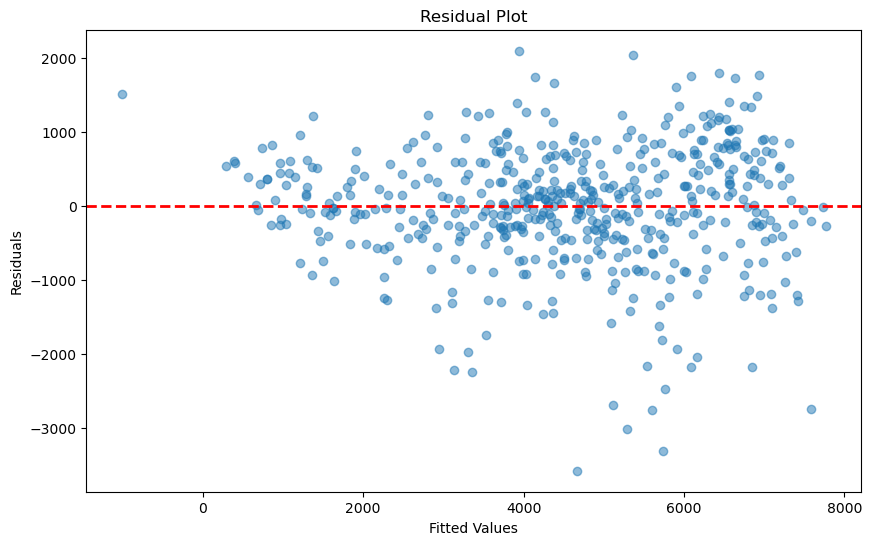

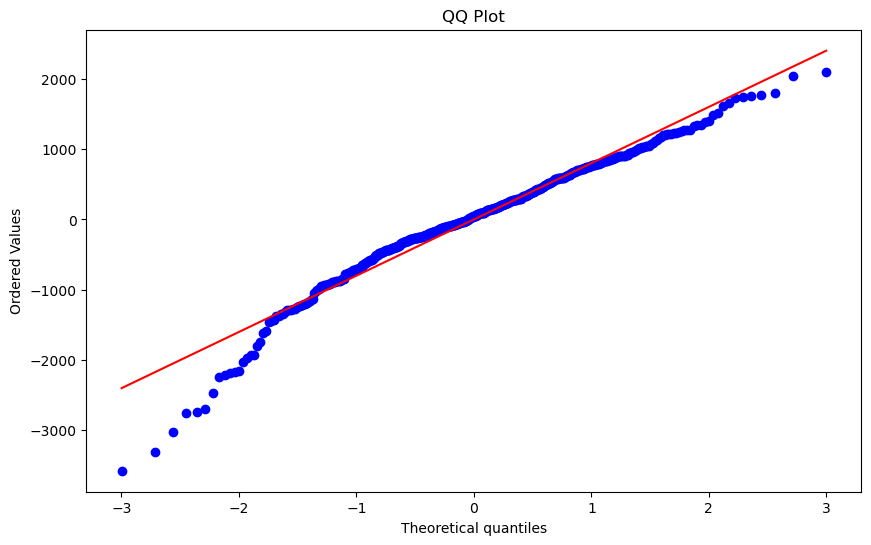

{'Lagrange Multiplier Statistic': 73.86579575334521,
 'p-value': 2.3362682007957153e-05,
 'F-Statistic': 2.8026939073660713,
 'F-Test p-value': 2.98535825819152e-06}

In [59]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan

# Calculate residuals
residuals = model_6.resid
fitted_values = model_6.fittedvalues

# 1. Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 2. QQ Plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

# 3. Homoskedasticity Test (Breusch-Pagan Test)
bp_test = het_breuschpagan(residuals, model.model.exog)
bp_test_results = {
    "Lagrange Multiplier Statistic": bp_test[0],
    "p-value": bp_test[1],
    "F-Statistic": bp_test[2],
    "F-Test p-value": bp_test[3]
}

bp_test_results

# Residual Analysis Results

#### 1. Residual Plot
The residual plot shows the residuals versus the fitted values. Ideally, the residuals should be randomly scattered around the horizontal axis (y=0), with no clear pattern. In our plot:
- The residuals appear to be randomly distributed, which is a good indication of a well-fitted model.
- There is no obvious pattern, suggesting that the model does not have major issues with non-linearity.

#### 2. QQ Plot
The QQ plot compares the quantiles of the residuals to the quantiles of a normal distribution.
- The points mostly follow the 45-degree line, indicating that the residuals are approximately normally distributed.
- Some deviations at the tails suggest minor departures from normality, but overall, the normality assumption holds reasonably well.

#### 3. Homoskedasticity Test (Breusch-Pagan Test)
The Breusch-Pagan test checks for heteroskedasticity (non-constant variance of residuals).
- The p-value from the Lagrange Multiplier Statistic and the F-Statistic is very small (\(< 0.05\)), indicating that we reject the null hypothesis of homoskedasticity.
- This suggests that there is evidence of heteroskedasticity in the residuals.

### Conclusion

While the residual and QQ plots indicate a reasonably good fit with normally distributed residuals, the Breusch-Pagan test suggests the presence of heteroskedasticity. This means that the variability of the residuals is not constant across all levels of the independent variables, which can affect the reliability of the coefficient estimates and their standard errors.


In [60]:
y_test.shape

(219,)

In [61]:
# Predicting and Evaluating on Test Set
#Finally, predict on the test set and evaluate the models performance.
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Final model
final_model = model_6

# Predict on the test set
y_pred = final_model.predict(X_test_6)

# Evaluate the model
mse_M1 = mean_squared_error(y_test, y_pred)
r2_M1 = r2_score(y_test, y_pred)

print(f"Mean Squared Error_M1: {mse_M1}")
print(f"R-squared_M1: {r2_M1}")

# Model summary
print(final_model.summary())

Mean Squared Error_M1: 7059776.606575578
R-squared_M1: -0.9026173055416522
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          6.52e-176
Time:                        23:16:23   Log-Likelihood:                -4148.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     495   BIC:                             8396.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

### Step 8: Model Evaluation

In [62]:
# Extract the coefficients and the intercept
intercept = final_model.params[0]
coefficients = final_model.params[1:]

# Create the regression equation as a string
regression_equation_M1 = f"cnt = {intercept:.4f}"

for i, col in enumerate(coefficients.index):
    regression_equation_M1 += f" + ({coefficients[i]:.4f} * {col})"

print("Best-Fitted Line Equation:")
print(regression_equation_M1)

Best-Fitted Line Equation:
cnt = 2213.0717 + (395.3409 * workingday) + (1082.3579 * temp) + (-213.3193 * hum) + (-198.7839 * windspeed) + (1097.3666 * days_old) + (1099.0352 * season_summer) + (852.2499 * season_winter) + (-858.0139 * mnth_dec) + (624.6544 * mnth_feb) + (713.5735 * mnth_jan) + (744.5980 * mnth_mar) + (722.3952 * mnth_sept) + (476.0551 * weekday_sat) + (-303.0827 * weathersit_bad) + (1476.6764 * weathersit_good) + (1039.4780 * weathersit_moderate)


We can see that the equation of our best fitted line is:
- cnt = 2213.0717 + (395.3409 * workingday) + (1082.3579 * temp) + (-213.3193 * hum) + (-198.7839 * windspeed) + (1097.3666 * days_old) + (1099.0352 * season_summer) + (852.2499 * season_winter) + (-858.0139 * mnth_dec) + (624.6544 * mnth_feb) + (713.5735 * mnth_jan) + (744.5980 * mnth_mar) + (722.3952 * mnth_sept) + (476.0551 * weekday_sat) + (-303.0827 * weathersit_bad) + (1476.6764 * weathersit_good) + (1039.4780 * weathersit_moderate)

In [64]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2_M1 = round(1-(1-r2_M1)*(X_test_6.shape[0]-1)/(X_test_6.shape[0]-X_test_6.shape[1]-1),4)
print(adjusted_r2_M1)

-1.0635


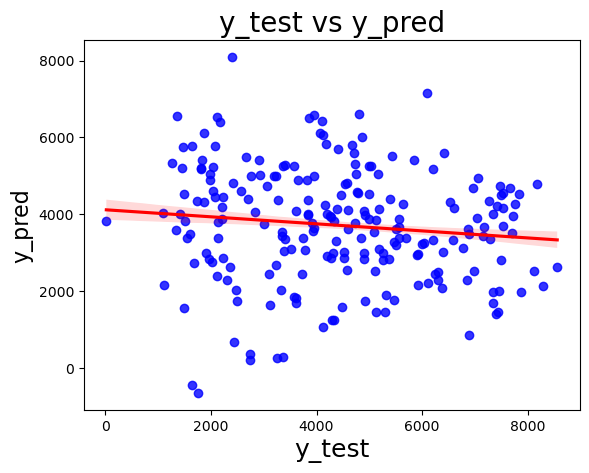

In [65]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Lets try Linear Regression model from SKLEARN

In [66]:
# Build a Linear Regression model using SKLearn for RFE
lr = LinearRegression()

In [67]:
assert bikeSharing_df.applymap(np.isreal).all().all(), "Non numeric values found"

In [68]:
#y to contain only target variable
X = bikeSharing_df.drop(columns = ['cnt'])

#X is all remainign variable also our independent variables
y = bikeSharing_df['cnt']

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
#Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [70]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 7),
 ('atemp', True, 1),
 ('hum', False, 8),
 ('windspeed', False, 9),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', True, 1),
 ('mnth_aug', False, 3),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 10),
 ('mnth_jan', False, 5),
 ('mnth_jul', False, 14),
 ('mnth_jun', False, 2),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 6),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 13),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 12),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 16),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [71]:
# Select the features
X_train_rfe = X_train.loc[:, rfe.support_]
X_test_rfe = X_test.loc[:, rfe.support_]

In [72]:
X_train_rfe = X_train.apply(pd.to_numeric, errors='coerce')

In [73]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'atemp', 'days_old', 'season_spring',
       'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')


In [74]:
# Check for missing values
print(X_train_rfe.isnull().sum())
# Optionally, drop rows with missing values or fill them with a value (e.g., the mean of the column)
X_train_rfe = X_train_rfe.dropna()  # or use X_train_rfe.fillna(X_train_rfe.mean())

yr                     0
holiday                0
workingday             0
temp                   0
atemp                  0
hum                    0
windspeed              0
days_old               0
season_spring          0
season_summer          0
season_winter          0
mnth_aug               0
mnth_dec               0
mnth_feb               0
mnth_jan               0
mnth_jul               0
mnth_jun               0
mnth_mar               0
mnth_may               0
mnth_nov               0
mnth_oct               0
mnth_sept              0
weekday_mon            0
weekday_sat            0
weekday_sun            0
weekday_thu            0
weekday_tue            0
weekday_wed            0
weathersit_bad         0
weathersit_good        0
weathersit_moderate    0
dtype: int64


In [75]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['temp', 'hum', 'windspeed', 'season_summer', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov',
       'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [76]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [77]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [78]:
X_train_rfe

,yr,holiday,workingday,atemp,days_old,season_spring,season_winter,mnth_mar,mnth_may,mnth_oct,mnth_sept,weekday_sat,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,-0.921053,1.511394,0,1,0,0,0,0,0,0,0,1
645,1,1,0,-0.533587,1.331070,0,1,0,0,1,0,0,0,0,1
163,0,0,1,0.780429,-0.956188,0,0,0,0,0,0,0,0,1,0
360,0,0,1,-0.901771,-0.021354,1,0,0,0,0,0,0,0,0,1
640,1,0,1,0.764953,1.307344,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,-0.579734,-1.392760,1,0,1,0,0,0,0,0,1,0
106,0,0,0,-0.176988,-1.226673,0,0,0,0,0,0,0,0,1,0
270,0,0,1,0.617772,-0.448435,0,1,0,0,0,1,0,0,0,1
435,1,0,1,-0.091682,0.334547,1,0,1,0,0,0,0,0,1,0


In [79]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
13,weathersit_good,14.66
4,days_old,12.43
0,yr,10.21
14,weathersit_moderate,8.48
6,season_winter,3.94
5,season_spring,3.08
3,atemp,2.99
2,workingday,1.81
11,weekday_sat,1.71
12,weathersit_bad,1.60


### 6.4 Manual elimination

##### Function to build a model using statsmodel api

In [80]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['temp', 'hum', 'windspeed', 'season_summer', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov',
       'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [81]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [82]:
X_train_rfe.shape

(511, 15)

### 6. Build Model 

### 6.1 Model 1 - Start with all variables selected by RFE

In [83]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

##### Function to calculate VIFs and print them

In [84]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [85]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'days_old', 'season_spring',
       'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [86]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.52e-183
Time:                        23:17:26   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3310.7735    

In [87]:
np.asarray(X_train_rfe)

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [88]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Convert all columns to numeric, coercing errors to NaN
X_train[cols] = X_train[cols].apply(pd.to_numeric, errors='coerce')

# Fill NaNs with the mean of the column
X_train = X_train.fillna(X_train.mean())

# Verify data types to ensure all are numeric
print(X_train[cols].dtypes)

# Function to build the model
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

# Assuming y_train is your target variable and cols are your selected features
build_model(cols)

yr                       int64
holiday                  int64
workingday               int64
temp                   float64
hum                    float64
windspeed              float64
season_spring            int64
season_summer            int64
season_winter            int64
mnth_jan                 int64
mnth_jul                 int64
mnth_sept                int64
weekday_sat              int64
weathersit_bad           int64
weathersit_moderate      int64
dtype: object
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.52e-183
Time:                        23:17:26   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:   

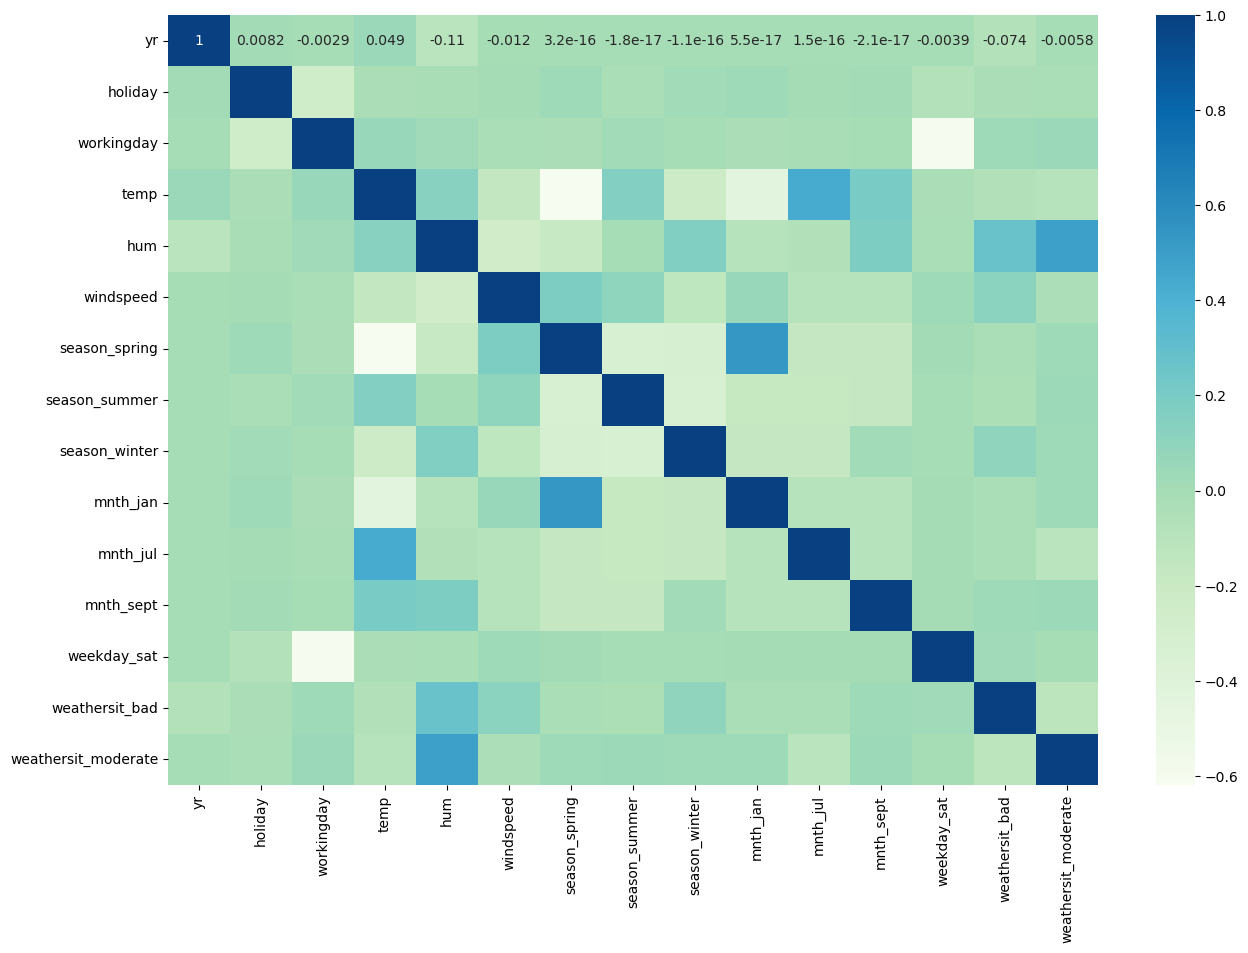

In [89]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

## Model 2

In [90]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.59e-184
Time:                        23:17:27   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3305.6404    

## Model 3

#### All the columns have p-value < .05 so checking VIFs

In [91]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.46e-181
Time:                        23:17:27   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3378.2610    

## Module 4

In [92]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.56e-182
Time:                        23:17:27   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3319.3371    

## Model 5

In [93]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.57e-182
Time:                        23:17:27   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3206.3628    

## Model 6

In [94]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.84e-150
Time:                        23:17:27   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4172.8228    

## Model 7

In [95]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 29 May 2024   Prob (F-statistic):           3.93e-97
Time:                        23:17:28   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2203.3686    

## Model 8

In [96]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 29 May 2024   Prob (F-statistic):           3.93e-97
Time:                        23:17:28   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2203.3686    

## Model 9

In [97]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.90e-146
Time:                        23:17:28   Log-Likelihood:                -4232.7
No. Observations:                 511   AIC:                             8487.
Df Residuals:                     500   BIC:                             8534.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4162.3897    

## Model 10

In [98]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          6.32e-145
Time:                        23:17:28   Log-Likelihood:                -4235.1
No. Observations:                 511   AIC:                             8492.
Df Residuals:                     500   BIC:                             8539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4479.8636    

## Model 11

In [99]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.33e-179
Time:                        23:17:28   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3979.9792    

#### `_Inference`_
Here VIF seems to be almost accepted. p-value for all the features is  almost 0.0 and R2 is 0.821 
Let us select Model 11 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [100]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [101]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

3979.9792334138756 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
   893.1806152 ]


In [102]:
# Print the intercept and coefficients
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

# Create the regression equation as a string
regression_equation_M2 = f"cnt = {lr.intercept_:.4f}"
for i, col in enumerate(cols):
    regression_equation_M2 += f" + ({lr.coef_[i]:.4f} * {col})"

print("Best-Fit Line Equation:")
print(regression_equation_M2)

Intercept: 3979.9792334138756
Coefficients: [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
   893.1806152 ]
Best-Fit Line Equation:
cnt = 3979.9792 + (2001.8857 * yr) + (-1170.1280 * season_spring) + (-482.8936 * mnth_jul) + (494.7681 * season_winter) + (483.0006 * mnth_sept) + (-335.8335 * weekday_sun) + (-2305.3236 * weathersit_bad) + (-665.3845 * weathersit_moderate) + (893.1806 * temp)


## Step 7. Model Evaluation 
### 7.1 Residual Analysis

In [103]:
y_train_pred = lr.predict(X_train[cols])

In [104]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

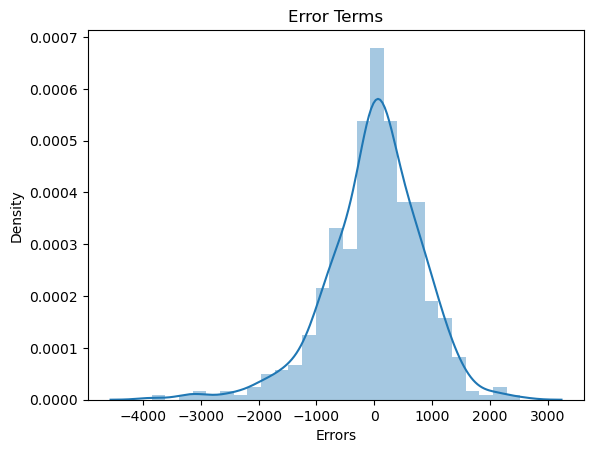

In [105]:
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

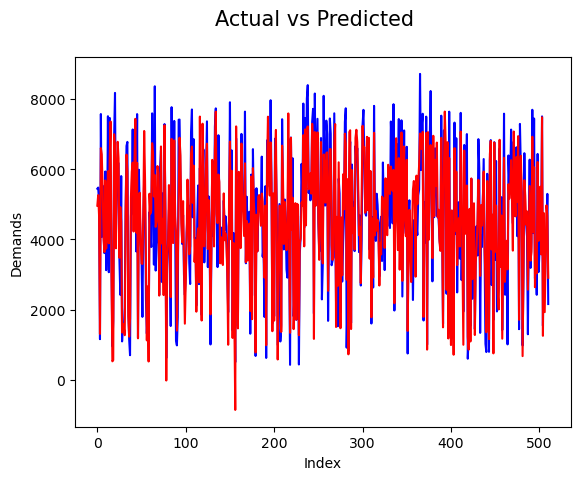

In [106]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems ok

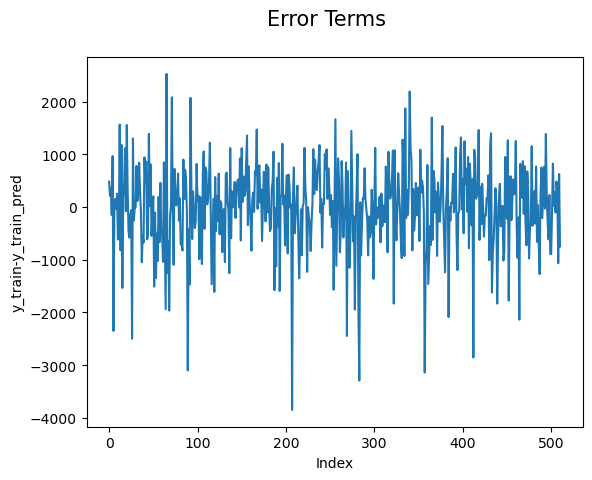

In [107]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Here,If we see the error terms are independent of each other.

In [108]:
#Print R-squared Value
r2_M2 = r2_score(y_train,y_train_pred)
print(r2_M2)

0.8185359364498817


### _`Inference`_
R2 Same as we obtained for our final model

### 7.2 Linearity Check

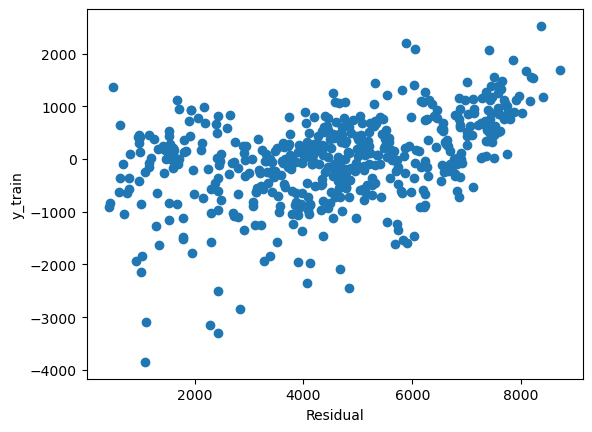

In [109]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 7.3 Predict values for test data set

In [110]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [111]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### 7.4 R-Squared value for test predictions

In [112]:
# Find out the R squared value between test and predicted test data sets.  
r2_score_M2 = r2_score(y_test,y_test_pred)
print(r2_score_M2)

-0.981969306694944


### 7.5 Homoscedacity

##### _`Inference`_ 
R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

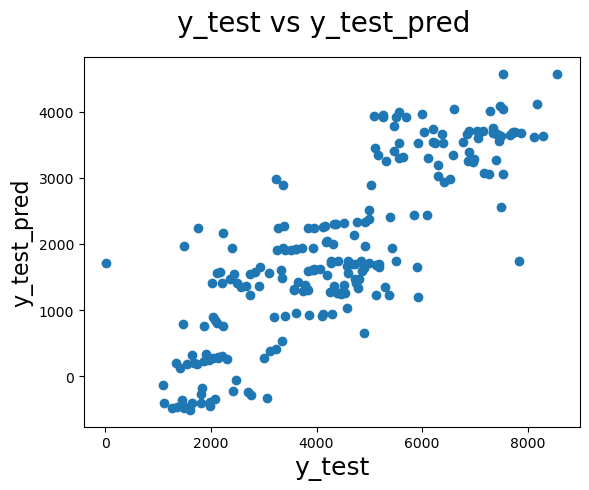

In [113]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

####  _`Inference`_
We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

### 7.8 Plot Test vs Predicted test values

In [114]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

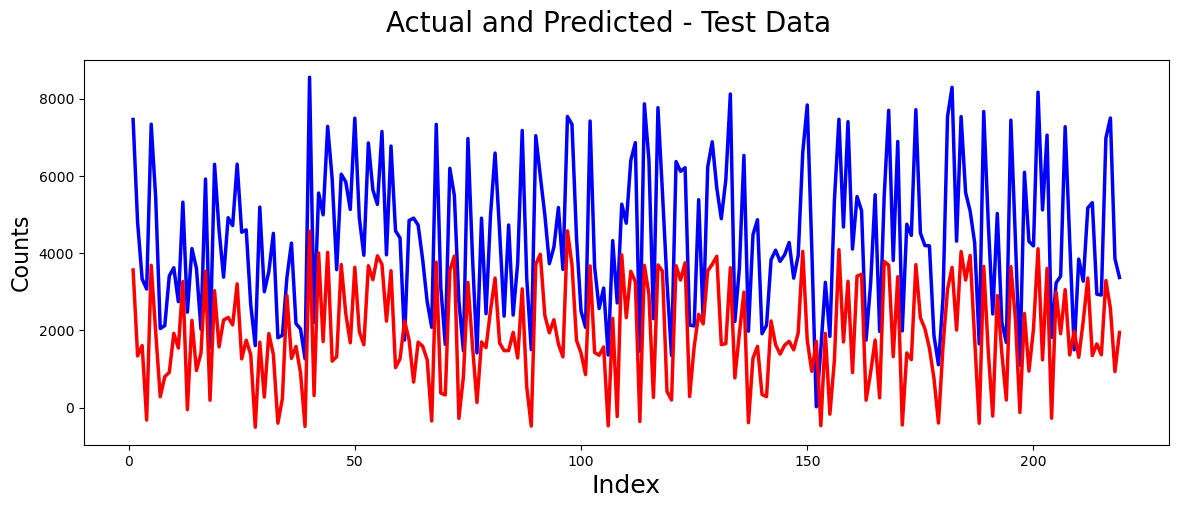

In [115]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### _`Inference`_
As we can see predictions for test data is very close to actuals

### 7.9 Plot Error Terms for test data

In [116]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

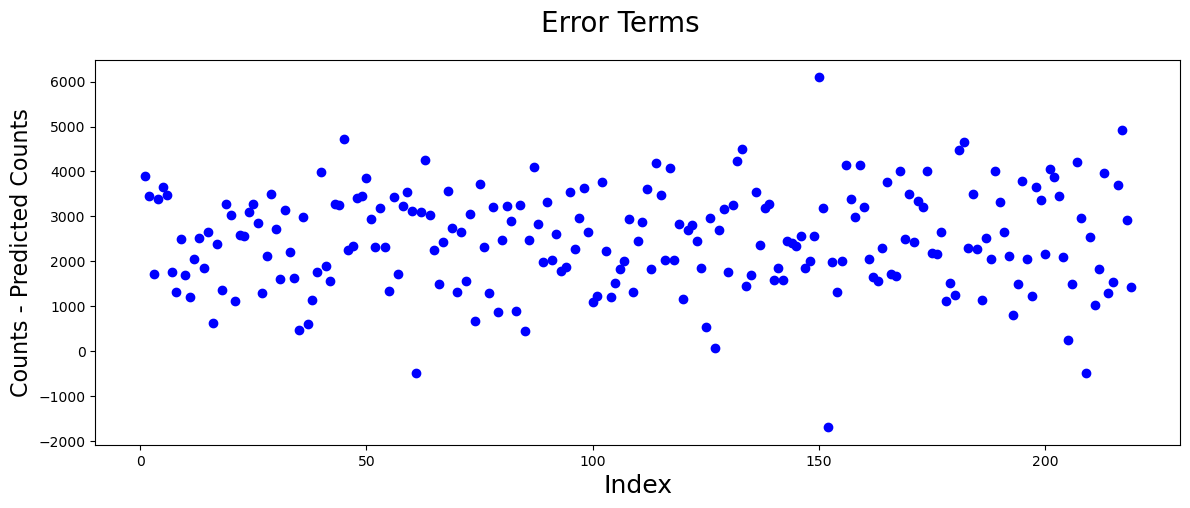

In [117]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

#### _`Inference`_
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

### 8. Making Predictions

In [118]:
# Checking data before scaling
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,-0.827613,-0.680818,1.252343,-0.387833,985,-1.729680,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,-0.722069,-0.741507,0.480996,0.748899,801,-1.724934,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,-1.635432,-1.750344,-1.338073,0.745931,1349,-1.720189,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,-1.615560,-1.610886,-0.261577,-0.389769,1562,-1.715444,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,-1.468226,-1.505615,-1.340294,-0.046477,1600,-1.710698,1,...,0,0,0,0,0,0,1,0,1,0


### 8.1 Intrepretting the Model

#### Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [119]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.33e-179
Time:                        23:17:31   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3979.9792    

### Interepretation of results

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to service the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- temp
- hum
- windspeed
- Season (Spring, Winter)
- months( July, September)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)     

### Comparison between two models 

In [120]:
print(r2_M1)
print(r2_score_M2)

-0.9026173055416522
-0.981969306694944


In [121]:
print(adjusted_r2_M1)
print(0.819)

-1.0635
0.819


In [122]:
print(regression_equation_M1)

cnt = 2213.0717 + (395.3409 * workingday) + (1082.3579 * temp) + (-213.3193 * hum) + (-198.7839 * windspeed) + (1097.3666 * days_old) + (1099.0352 * season_summer) + (852.2499 * season_winter) + (-858.0139 * mnth_dec) + (624.6544 * mnth_feb) + (713.5735 * mnth_jan) + (744.5980 * mnth_mar) + (722.3952 * mnth_sept) + (476.0551 * weekday_sat) + (-303.0827 * weathersit_bad) + (1476.6764 * weathersit_good) + (1039.4780 * weathersit_moderate)


In [123]:
print(regression_equation_M2)

cnt = 3979.9792 + (2001.8857 * yr) + (-1170.1280 * season_spring) + (-482.8936 * mnth_jul) + (494.7681 * season_winter) + (483.0006 * mnth_sept) + (-335.8335 * weekday_sun) + (-2305.3236 * weathersit_bad) + (-665.3845 * weathersit_moderate) + (893.1806 * temp)
